## Data Visualisation with Python

In [1]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Step Process
1. Load Data
2. Inspect Data
3. Clean Data (if needed)
4. Explore + Visualise Data
5. Derive insights from Data Exploration/Visualisation

### Example 1: Forbes 2022 Data

#### 1. Load Data

In [2]:
forbes = pd.read_csv("forbes_2022.csv")
forbes

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


#### 2. Inspect Data

In [3]:
#If True, means duplicate
forbes.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2595    False
2596    False
2597    False
2598    False
2599    False
Length: 2600, dtype: bool

In [4]:
forbes.duplicated().sum()

0

In [5]:
forbes.isnull().sum()

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

In [6]:
#if has null value
#forbes.dropna()

In [6]:
#Check data type, see if the type makes sense
forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


#### 3. Clean Data

In [7]:
#Dtype is object indicates a generic type that can represent any Python object, including string, numbers..
#for a dataframe in pandas, it usually represents string

#Replace the $ and B with empty string
#str.replace(oldvalue,newvalue,count)
forbes['networth'] = forbes['networth'].str.replace('$', '')
forbes['networth'] = forbes['networth'].str.replace('B', '')

#Change type to numeric
forbes['networth'] = pd.to_numeric(forbes['networth'])

/var/folders/fq/8t9cyhs53ql809q23q2w62wh0000gn/T/ipykernel_14780/2360742752.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['networth'] = forbes['networth'].str.replace('$', '')


#### 4. Explore Data

In [8]:
forbes.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [9]:
# Finding the industry with the highest number of billionaires
#value_counts() counts the frequency of unique values in specific columns of a dataframe
forbes['industry'].value_counts().sort_index()

Automotive                      69
Construction & Engineering      43
Diversified                    178
Energy                          93
Fashion & Retail               246
Finance & Investments          386
Food & Beverage                201
Gambling & Casinos              23
Healthcare                     212
Logistics                       35
Manufacturing                  322
Media & Entertainment           95
Metals & Mining                 67
Real Estate                    189
Service                         51
Sports                          26
Technology                     329
Telecom                         35
Name: industry, dtype: int64

In [10]:
# To display the top 5 industries with the most number of billionaires
forbes['industry'].value_counts()[:5]

Finance & Investments     386
Technology                329
Manufacturing             322
Fashion & Retail          246
Healthcare                212
Name: industry, dtype: int64

<AxesSubplot: >

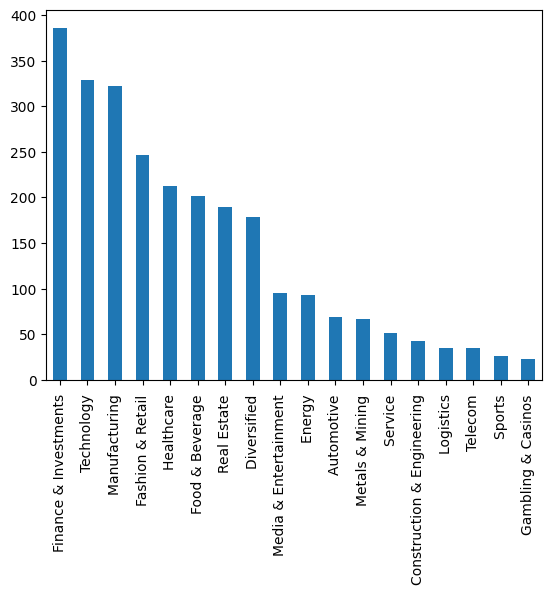

In [11]:
# show the number of billionaires in each industry with bar chart
forbes['industry'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

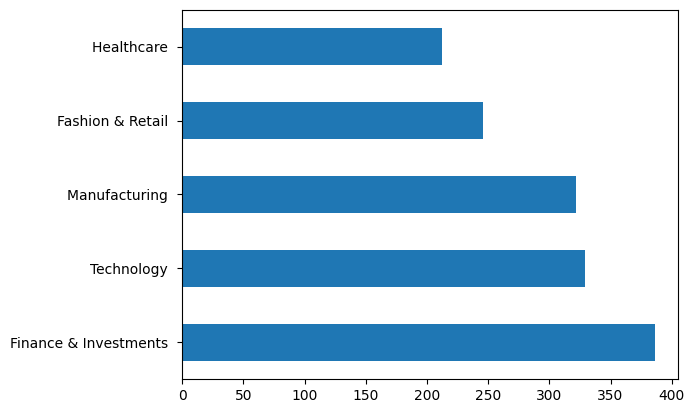

In [13]:
#Horizontal bar
forbes['industry'].value_counts()[:5].plot(kind = 'barh')

<AxesSubplot: >

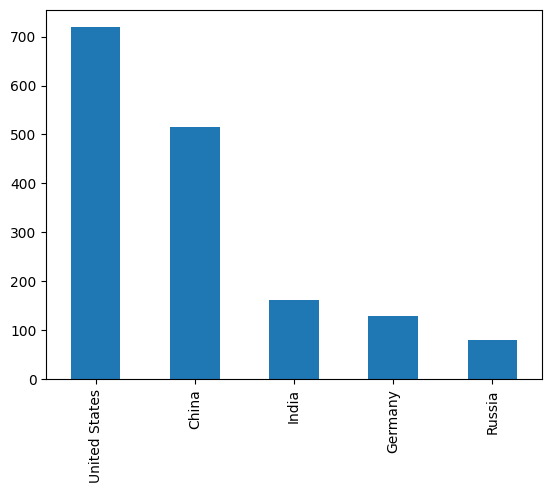

In [15]:
# Finding the country with the highest number of billionaires
forbes['country'].value_counts()[:5].plot(kind = 'bar')

In [16]:
#display the top 3 countries with the most billionaries
forbes[forbes['networth'] >= 60]

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,5,6,Larry Page,111.0,49,United States,Google,Technology
6,6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,7,8,Larry Ellison,106.0,77,United States,software,Technology
8,8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


In [ ]:
# Find the billionaires with networth more than 60 billion dollars
#To filter a dataframe base on a condition, we need to use dataframe[condition] where the condition is a boolean expression
#condition=forbes['networth']>=60,True-more than or equal 60, False-less than 60

# OR


In [17]:
#find the top 5 youngest billionaires
forbes.sort_values(by = ['age'])[:5]

,Unnamed: 0,rank,name,networth,age,country,source,industry
1311,1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail
2062,2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals & Mining
1975,1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance & Investments
2190,2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance & Investments


In [ ]:
# rearrange the dataframe by ascending or descending order of specific column
#parameter of sort_values: by-specify label to sort by, axis:0 or 1, ascending:True or False


In [20]:
# Finding the top 5 youngest people who have networth of more than 50 billion
forbes_more_50 = forbes[forbes['networth'] >= 50]
forbes_more_50.sort_values(by = ['age'])[0:5]
#Or

,Unnamed: 0,rank,name,networth,age,country,source,industry
14,14,15,Mark Zuckerberg,67.3,37,United States,Facebook,Technology
24,24,25,Zhang Yiming,50.0,38,China,TikTok,Media & Entertainment
19,19,19,Changpeng Zhao,65.0,44,Canada,cryptocurrency exchange,Finance & Investments
6,6,7,Sergey Brin,107.0,48,United States,Google,Technology
5,5,6,Larry Page,111.0,49,United States,Google,Technology


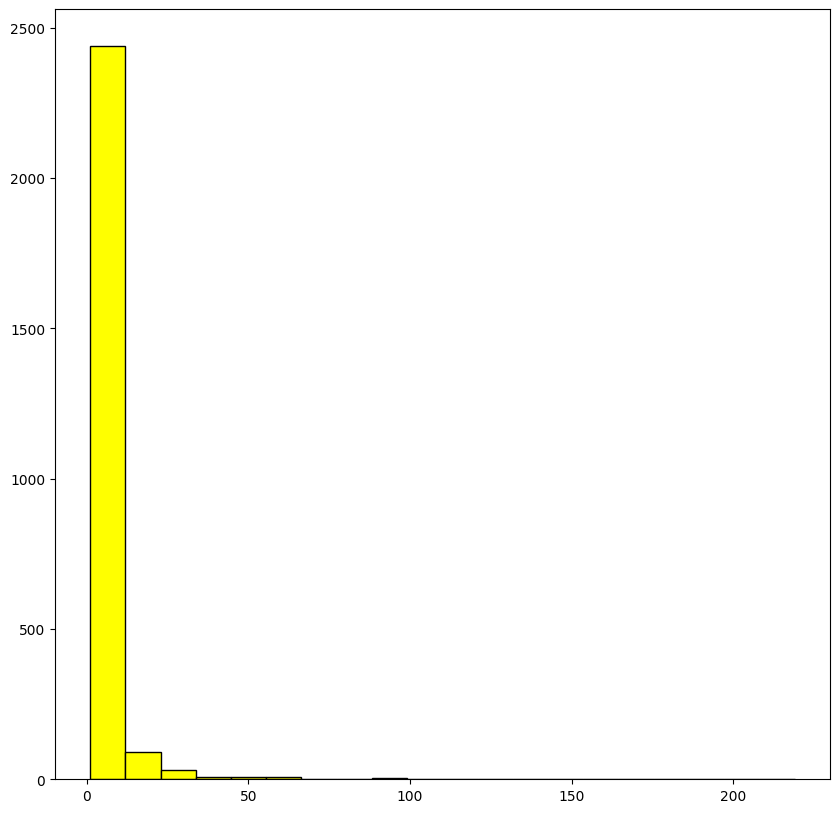

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(forbes.networth, bins = 20, edgecolor = 'black', color = 'yellow')
plt.show()

In [ ]:
#Using the method we used previously

# the higher the bin, the closer it is to the distribution plot which will be explained later
 #Notice the graphs are still similar to each other

##### Data Visualisation - Distribution Plot
- Shows how a variable in your data is distributed

# Distribution Plot

> parameter:
* data: dataframe name
* x,y,hue: variable name
* kind:{“hist”, “kde”, “ecdf”} hist by default, same as histplot(), kdeplot(), ecdfplot(univariate data only)
* color, palette, height...

1.   kernel density estimation:KDE represents the data using a continuous probability density curve, more smooth
2.    empirical cumulative distribution function: represents the proportion or counts of observations


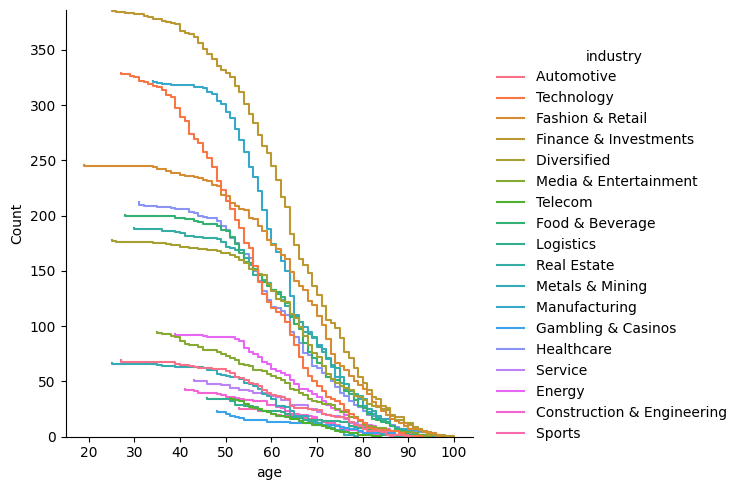

In [24]:
#Distribution plot of the age variable
#sns.displot(x = 'age', data = forbes)
#plt.show()

sns.displot(x = 'age', hue = 'industry', kind = 'ecdf', data = forbes, stat = 'count', complementary = True)
plt.show()

Observation from dataset:
1. Most saturated industry/best industry (Finance & Investments)
2. Country with the most opportunity (US) - may be too saturated
3. Who to learn from (THose that really made it)
4. Probable age for someone to get really rich (50-70 years old)

### Example 2: Annual Sales 2018 Data

#### 1. Load Data

In [26]:
data = pd.read_csv('2018_annual.csv')
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215"
1,1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001"
2,2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035"
3,3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301"
4,4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016"


In [27]:
#parameter of drop: label, axis: 1 for column, 0 for index, default 0
#Better to name it with another variable so that you can keep the original dataset under the variable 'data'
df = data.drop('Unnamed: 0', axis = 1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215"
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001"
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035"
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301"
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016"


#### 2. Inspect Data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


#### 3. Clean Data

In [30]:
#Convert 'Order Date' column into datetime type
df['Order Date'] = df['Order Date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


#### 4. Explore Data

In [31]:
# series.dt can be used to access the values of the series as datetimelike and return several properties
#dt.year will return year, dt.weekday will return the day of week
df['Year'] = df['Order Date'].dt.year
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",2018
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",2018
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",2018
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",2018
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",2018


In [36]:
#Which month had the best sales?
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",2018,9,17
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",2018,9,29
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",2018,9,16
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",2018,9,27
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",2018,9,1


In [37]:
#create a new column called Sale
df['Sale'] = df['Price Each'] * df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Sale
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",2018,9,17,15.36
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",2018,9,29,23.90
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",2018,9,16,11.95
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",2018,9,27,149.99
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",2018,9,1,11.95


In [45]:
df['Month'] = pd.to_numeric(df['Month'])
df['Order Date'] = pd.to_numeric(df['Order Date'])

groupby_month = df.groupby('Month')
groupby_month.head()

gross_sales_by_month = groupby_month['Sale'].sum().sort_values()
gross_sales_by_month

Month
1     1816846.41
9     2091892.33
2     2195978.76
8     2239309.25
6     2570410.65
7     2641281.10
3     2800592.49
5     3144348.98
11    3190667.83
4     3378020.92
10    3727769.15
12    4603683.90
Name: Sale, dtype: float64

In [ ]:
#here Month is index label not variable


###### ***HOW THE PREVIOUS CODE LOOK LIKE (STEP BY STEP)***

In [ ]:
#How it looks like, ingore the rest of the table except for Sales

In [ ]:
 #Rearranging the sales amount in ascending amount

In [ ]:
 #Get only the 'Sales' column

#### Data Visualisation

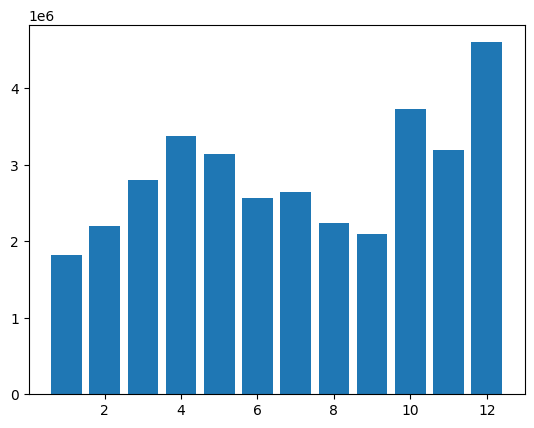

In [46]:
#Data Visualisation
plt.bar(gross_sales_by_month.index, gross_sales_by_month)
plt.show()

# what is def
  * def function name(argument):
  * statement
  * return expression

In [42]:
#example


In [47]:
#Finding the orders where the production city is the same as the city in the purchase address

  #address patteern is street,city,postal code
  #split() split a string into a list of substrings, the parameter is separator

 #you can apply a function you defined earlier in the dataset, the parameter: func

def city_from_address(address):
    substrs = address.split(',')
    city = substrs[1].strip()

    return city

df['City'] = df['Purchase Address'].apply(city_from_address)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Sale,City
0,248151,AA Batteries (4-pack),4,3.84,1537195440000000000,"883 West St, Boston, MA 02215",2018,9,17,15.36,Boston
1,248152,USB-C Charging Cable,2,11.95,1538216340000000000,"71 Ridge St, New York City, NY 10001",2018,9,29,23.90,New York City
2,248153,USB-C Charging Cable,1,11.95,1537120080000000000,"372 Spruce St, Portland, OR 97035",2018,9,16,11.95,Portland
3,248154,27in FHD Monitor,1,149.99,1538034720000000000,"315 Meadow St, Atlanta, GA 30301",2018,9,27,149.99,Atlanta
4,248155,USB-C Charging Cable,1,11.95,1535828580000000000,"408 Lake St, San Francisco, CA 94016",2018,9,1,11.95,San Francisco


/var/folders/fq/8t9cyhs53ql809q23q2w62wh0000gn/T/ipykernel_14780/1119883084.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gross_sales_by_city = groupby_month.sum()['Sale']


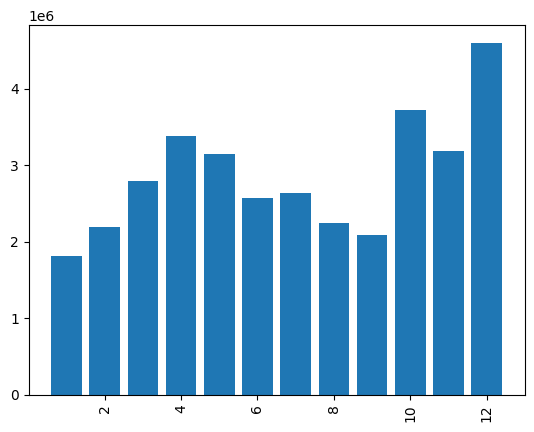

In [49]:
#Group data by cities
groupby_city = df.groupby('City')
gross_sales_by_city = groupby_month.sum()['Sale']
gross_sales_by_city

plt.bar(gross_sales_by_city.index, gross_sales_by_city)
plt.xticks(rotation = 90)
plt.show()

In [50]:
#Which city makes the best sales across all 12 months
groupby_data = df.groupby(['Month', 'City']).sum()['Sale']
groupby_data


/var/folders/fq/8t9cyhs53ql809q23q2w62wh0000gn/T/ipykernel_14780/2773297854.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_data = df.groupby(['Month', 'City']).sum()['Sale']


Month  City         
1      Atlanta           140897.76
       Austin            108931.35
       Boston            195159.63
       Dallas            149855.22
       Los Angeles       283262.80
                           ...    
12     Los Angeles       738315.55
       New York City     601734.15
       Portland          327456.56
       San Francisco    1102080.28
       Seattle           388580.13
Name: Sale, Length: 108, dtype: float64

In [52]:
#display information of gross sales in every city for 1st 3 months
#loc, accedd a group of rows based on positional index
# group_data.loc[3,:] means select a specific row based on 3 and all its columns
#why use []? In pandas, using [] to access elements form df, () for function calls

groupby_data.loc[1:3, :]

Month  City         
1      Atlanta          140897.76
       Austin           108931.35
       Boston           195159.63
       Dallas           149855.22
       Los Angeles      283262.80
       New York City    253099.75
       Portland         119171.46
       San Francisco    428303.33
       Seattle          138165.11
2      Atlanta          179923.72
       Austin           129885.50
       Boston           248039.51
       Dallas           175834.93
       Los Angeles      342658.07
       New York City    293728.78
       Portland         148917.02
       San Francisco    514205.24
       Seattle          162785.99
3      Atlanta          241112.23
       Austin           166382.80
       Boston           305137.75
       Dallas           230516.67
       Los Angeles      424076.35
       New York City    359836.21
       Portland         186860.28
       San Francisco    665278.48
       Seattle          221391.72
Name: Sale, dtype: float64

In [54]:
# Can query individual cities (Example: Atlanta)
groupby_data.loc[1:3, 'Atlanta']

Month  City   
1      Atlanta    140897.76
2      Atlanta    179923.72
3      Atlanta    241112.23
Name: Sale, dtype: float64

In [55]:
#query each month sales for specific city
cities = df['City'].unique()
cities

array(['Boston', 'New York City', 'Portland', 'Atlanta', 'San Francisco',
       'Dallas', 'Austin', 'Los Angeles', 'Seattle'], dtype=object)

# create a line chart to show how the sale change in each city for 12 months?

In [56]:
# Get a list of cities
 #so there will be no duplicate
cities = df['City'].unique()
cities

array(['Boston', 'New York City', 'Portland', 'Atlanta', 'San Francisco',
       'Dallas', 'Austin', 'Los Angeles', 'Seattle'], dtype=object)

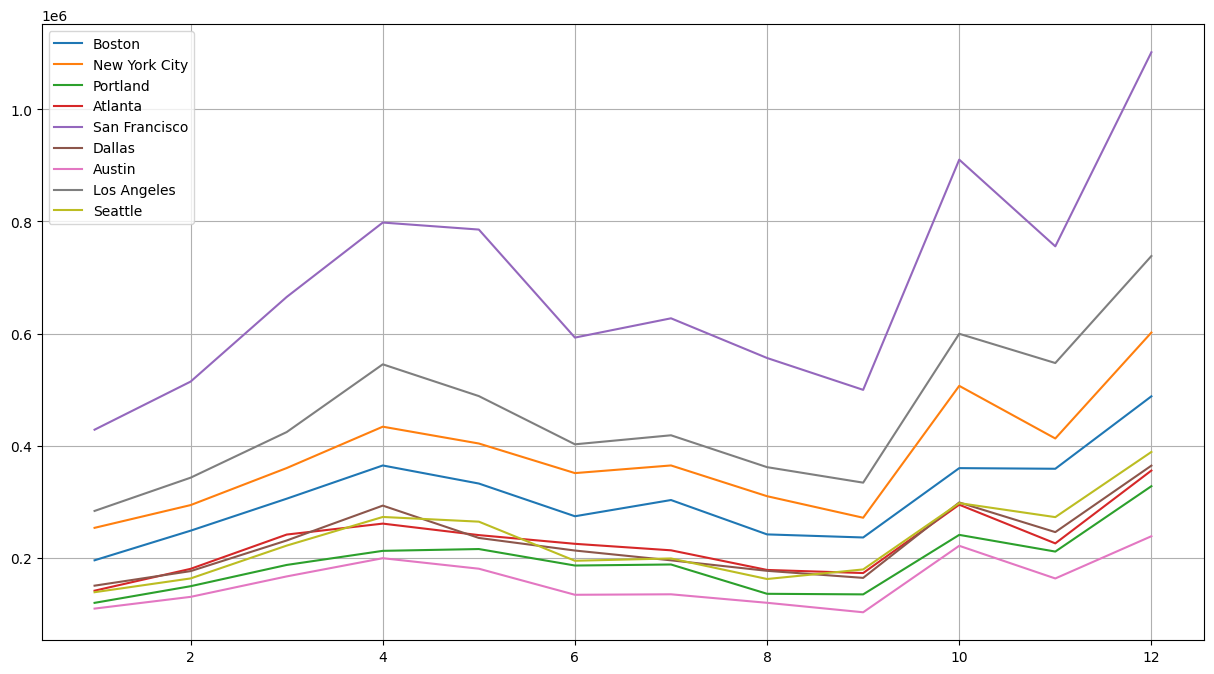

In [58]:

  #Get the city's 12 months of sales


  #Plot line plot for this city
  #parameter: only y is required

fig, ax = plt.subplots(figsize = (15, 8))

for city in cities:
    current_sales = groupby_data.loc[:, city]
    ax.plot(current_sales, label = city)

plt.grid()
plt.legend()
plt.show()